# Session 7: Sentiment Analysis Deep Dive

## 📚 Learning Objectives
- Understand rule-based and ML-based sentiment analysis
- Apply VADER and machine learning models for sentiment
- Handle negation and context in sentiment analysis
- Visualize sentiment distribution and results

---

## 🛠️ Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

from nltk.sentiment import SentimentIntensityAnalyzer
print('✅ Libraries imported and NLTK data downloaded!')

✅ Libraries imported and NLTK data downloaded!


## 📊 Data Preparation
We'll use a small sample of product reviews for demonstration.

In [2]:
# Sample product reviews
reviews = [
    'This product is amazing! I love it.',
    'Terrible experience, will not buy again.',
    'It works as expected. Nothing special.',
    'Absolutely fantastic! Exceeded my expectations.',
    'Not worth the price. Very disappointed.',
    'Great value for money.',
    'The quality is poor and it broke quickly.',
    'I am satisfied with my purchase.',
    'Worst product ever.',
    'Decent, but could be better.'
]
labels = ['positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'neutral']
df = pd.DataFrame({'review': reviews, 'label': labels})
df.head()

,review,label
0,This product is amazing! I love it.,positive
1,"Terrible experience, will not buy again.",negative
2,It works as expected. Nothing special.,neutral
3,Absolutely fantastic! Exceeded my expectations.,positive
4,Not worth the price. Very disappointed.,negative


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in _df_2.groupby('review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('review')
_ = plt.ylabel('label')

## 🏋️ Exercise 1: VADER Rule-Based Sentiment Analysis
Apply VADER to classify sentiment and visualize the distribution.

                                            review     label  vader_score  \
0              This product is amazing! I love it.  positive       0.8516   
1         Terrible experience, will not buy again.  negative      -0.4767   
2           It works as expected. Nothing special.   neutral      -0.3089   
3  Absolutely fantastic! Exceeded my expectations.  positive       0.6352   
4          Not worth the price. Very disappointed.  negative      -0.6198   
5                           Great value for money.  positive       0.7579   
6        The quality is poor and it broke quickly.  negative      -0.7096   
7                 I am satisfied with my purchase.  positive       0.4215   
8                              Worst product ever.  negative      -0.6249   
9                     Decent, but could be better.   neutral       0.5927   

  vader_pred  
0   positive  
1   negative  
2   negative  
3   positive  
4   negative  
5   positive  
6   negative  
7   positive  
8   negative  
9 

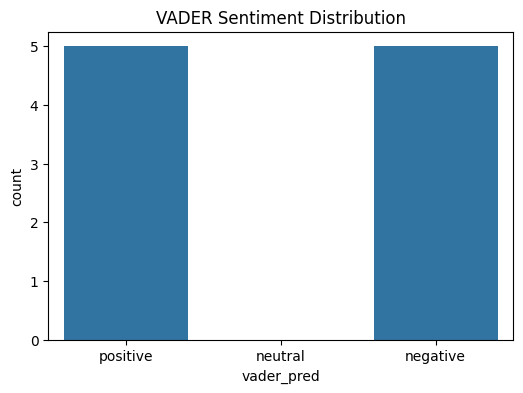

In [5]:
sia = SentimentIntensityAnalyzer()
df['vader_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
def vader_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['vader_pred'] = df['vader_score'].apply(vader_label)
print(df)
print('VADER Sentiment Predictions:')
print(df[['review', 'vader_score', 'vader_pred']])

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='vader_pred', data=df, order=['positive','neutral','negative'])
plt.title('VADER Sentiment Distribution')
plt.show()

## 🏋️ Exercise 2: ML-Based Sentiment Classification
Train a logistic regression model using TF-IDF features.

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



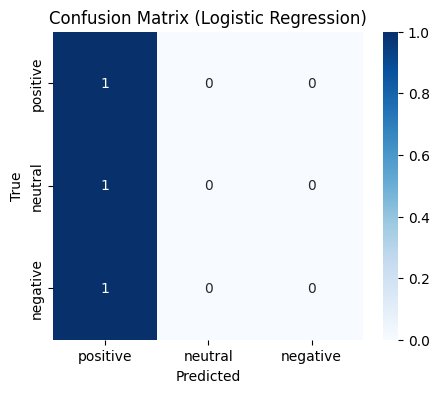

In [6]:
# Preprocessing
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive','neutral','negative'])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive','neutral','negative'], yticklabels=['positive','neutral','negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

## 🏋️ Exercise 3: Handling Negation and Context
Explore how negation affects sentiment and analyze context.

In [8]:
negation_examples = [
    'I do not like this product.',
    'Not bad at all!',
    'I cant say its good.',
    'This is not the worst experience.',
    'I am not unhappy with the result.'
]
for text in negation_examples:
    score = sia.polarity_scores(text)['compound']
    label = vader_label(score)
    print(f'"{text}" -> Score: {score:.2f}, Sentiment: {label}')

"I do not like this product." -> Score: -0.28, Sentiment: negative
"Not bad at all!" -> Score: 0.48, Sentiment: positive
"I cant say its good." -> Score: -0.34, Sentiment: negative
"This is not the worst experience." -> Score: 0.51, Sentiment: positive
"I am not unhappy with the result." -> Score: 0.33, Sentiment: positive


## 🏋️ Exercise 4: Sentiment Distribution Analysis
Visualize the distribution of sentiment labels in the dataset.

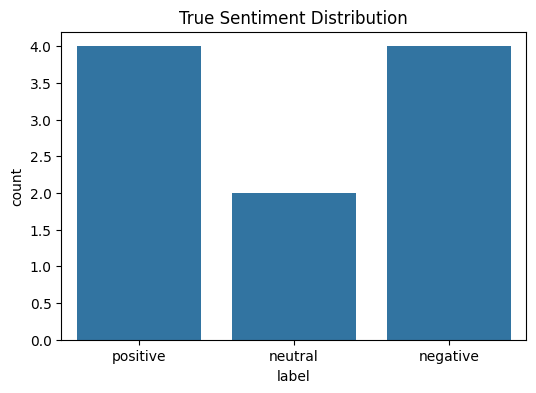

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, order=['positive','neutral','negative'])
plt.title('True Sentiment Distribution')
plt.show()

## 📚 Summary
- Compared VADER rule-based and ML-based sentiment analysis
- Explored negation and context effects
- Visualized sentiment distributions

**Next steps:** Try with larger datasets, experiment with other models (SVM, transformers), and analyze real-world data!